# Qualitative Data

# Chi-Squared Test

- $$H_0 : Variable 1, Variable 2 (independent, no relationship) $$
- $$H_1 : Variable 1, Variable 2 (dependent, relationship) $$

- $$ P-Value < \alpha $$
- $$: reject H_0$$

## Constraints
- 1) All variables are Independent
- 2) n >= 50
- 3) Expected Frequency each group >= 5
- 4) chi^2 of degree of freedom = 1 & n < 50 >>> Adjusted Yate's

## Chi-Squared Test
- [Ex1](#Ex1-:-Blood-Pressure-&-Smoking-Relationship-?)
- [Ex2](#Ex2-:-Sex-&-Reading-E-book-Relationship-?)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

## Ex1 : Blood Pressure & Smoking Relationship ?

- $$H_0 : Blood Pressure_- Smoking = Independent $$
- $$H_1 : Blood Pressure_-Smoking = Dependent $$

In [2]:
Blood_Smoking = pd.read_excel('Blood_Smoke.xlsx', sheet_name='Sheet2')

Blood_Smoking.columns = ['Blood Pressure', 'Smoking', 'Value']
Blood_Smoking['Blood Pressure'] = Blood_Smoking['Blood Pressure'].map({'สูง':'high','ต่ำ':'Normal'})
Blood_Smoking['Smoking'] = Blood_Smoking['Smoking'].map({'สูบบุหรี่จัด':'high smoking',
                                                         'สูบบุหรี่ปานกลาง':'mid smoking',
                                                         'ไม่สูบบุหรี่':'no smoking'})
Blood_Smoking

,Blood Pressure,Smoking,Value
0,high,no smoking,24
1,high,mid smoking,39
2,high,high smoking,34
3,Normal,no smoking,51
4,Normal,mid smoking,29
5,Normal,high smoking,23


In [3]:
cross_Bl_Sm = pd.crosstab(index=Blood_Smoking['Blood Pressure'],
                          columns=Blood_Smoking['Smoking'],
                          values=Blood_Smoking['Value'],
                          aggfunc='sum')

cross_Bl_Sm.columns.name = None
cross_Bl_Sm

,high smoking,mid smoking,no smoking
Blood Pressure,,,
Normal,23,29,51
high,34,39,24


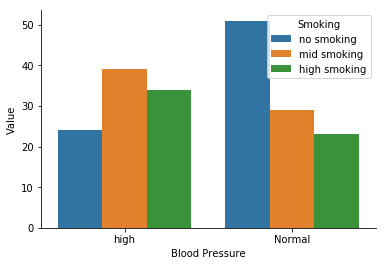

In [4]:
sns.barplot(x='Blood Pressure', y='Value' , data = Blood_Smoking, hue='Smoking')
sns.despine()

### Chi-Squared Test

In [5]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_Bl_Sm)
 
print("==================================================[Chi2 Stat]================================================")
print('Chi2 Test: ', chi2_stat)

# interpret test-statistic   
prob = 0.95
critical = stats.chi2.pdf(prob, dof)
if abs(chi2_stat) >= critical:
    print('chi2_stat: {} > critical region: {} = Dependent (Reject Null Hypothesis(H0))'.format(chi2_stat, critical))
else:
    print('chi2_stat: {} > critical region: {} = Independent (Accept Null Hypothesis(H0))'.format(chi2_stat, critical))
print("\n")


print("==============================================[Degrees of Freedom]===========================================")
print('Degree of freedom: ', dof)
print("\n")

print("=====================================================[P-Value]===============================================")
print('P-Value: ',p_val)

# interpret P-vale   
prob = 0.95
alpha = 1.0 - prob
if p_val <= alpha:
    print('α: {} > p-value: {} = Dependent (Reject Null Hypothesis(H0))'.format(alpha, p_val))
else:
    print('α: {} < p-value: {} = Independent (Accept Null Hypothesis(H0))'.format(alpha, p_val))
print("\n")


print("================================================[Expected Frequency]=========================================")
print(ex)
print('\n')

==================================================[Chi2 Stat]================================================
Chi2 Test:  13.145225956198558
chi2_stat: 13.145225956198558 > critical region: 0.31094252823251006 = Dependent (Reject Null Hypothesis(H0))


==============================================[Degrees of Freedom]===========================================
Degree of freedom:  2


=====================================================[P-Value]===============================================
P-Value:  0.001398139327527964
α: 0.050000000000000044 > p-value: 0.001398139327527964 = Dependent (Reject Null Hypothesis(H0))


================================================[Expected Frequency]=========================================
[[29.355 35.02  38.625]
 [27.645 32.98  36.375]]




In [6]:
# Expected Frequency Table
Expected_values = pd.DataFrame(ex, index=['Normal', 'high'], columns=['high smoking', 'mid smoking', 'no smoking'])
Expected_values

,high smoking,mid smoking,no smoking
Normal,29.355,35.02,38.625
high,27.645,32.98,36.375


### Conclusion
Question : Blood Pressure & Smoking Relationship ?
- Rccept Null Hypothesis(H0) >>> Blood Pressure & Smoking Relationship = Dependent

    - ค่า Chi-square value (13.145225956198558)
    - ค่า p-value (0.824)
    - ค่า degree of freedom (2)
    - ค่า Expected frequencies > 5 (array)

---

## Ex2 : Sex & Reading E-book Relationship ?

- $$H_0 : Sex_-Reading E-book = Independent $$
- $$H_1 : Sex_-Reading E-book = Dependent $$

In [7]:
Sex_Reading = pd.read_excel('Sex_Ebook.xlsx', sheet_name='Sheet2')
Sex_Reading['Sex'] = Sex_Reading['Sex'].map({'ชาย':'Male','หญิง':'Female'})
Sex_Reading['Reading'] = Sex_Reading['Reading'].map({'อ่านเป็นประจำ':'Always',
                                                    'อ่านบ้างเป็นครั้งคราว':'Sometime',
                                                    'ไม่ต้องอ่านเลย':'Never'})

Sex_Reading

,Sex,Reading,Value
0,Male,Always,65
1,Male,Sometime,40
2,Male,Never,5
3,Female,Always,25
4,Female,Sometime,60
5,Female,Never,15


In [8]:
Cross_Sx_Read = pd.crosstab(Sex_Reading['Sex'],
                            Sex_Reading['Reading'],
                            Sex_Reading['Value'],
                            aggfunc='sum')
Cross_Sx_Read.columns.name = None
Cross_Sx_Read

,Always,Never,Sometime
Sex,,,
Female,25,15,60
Male,65,5,40


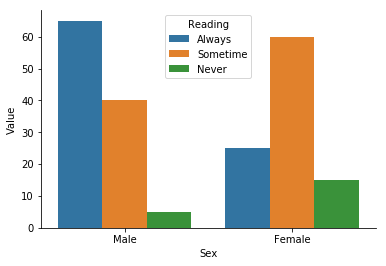

In [9]:
sns.barplot(x='Sex', y='Value' , data = Sex_Reading, hue='Reading')
sns.despine()

### Chi-Squared Test

In [10]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(Cross_Sx_Read)
 
print("==================================================[Chi2 Stat]================================================")
print('Chi2 Test: ', chi2_stat)

# interpret test-statistic   
prob = 0.95
critical = stats.chi2.pdf(prob, dof)
if abs(chi2_stat) >= critical:
    print('chi2_stat: {} > critical region: {} = Dependent (Reject Null Hypothesis(H0))'.format(chi2_stat, critical))
else:
    print('chi2_stat: {} > critical region: {} = Independent (Accept Null Hypothesis(H0))'.format(chi2_stat, critical))
print("\n")


print("==============================================[Degrees of Freedom]===========================================")
print('Degree of freedom: ', dof)
print("\n")

print("=====================================================[P-Value]===============================================")
print('P-Value: ',p_val)

# interpret P-vale   
prob = 0.95
alpha = 1.0 - prob
if p_val <= alpha:
    print('α: {} > p-value: {} = Dependent (Reject Null Hypothesis(H0))'.format(alpha, p_val))
else:
    print('α: {} < p-value: {} = Independent (Accept Null Hypothesis(H0))'.format(alpha, p_val))
print("\n")


print("================================================[Expected Frequency]=========================================")
print(ex)
print('\n')

==================================================[Chi2 Stat]================================================
Chi2 Test:  26.361363636363635
chi2_stat: 26.361363636363635 > critical region: 0.31094252823251006 = Dependent (Reject Null Hypothesis(H0))


==============================================[Degrees of Freedom]===========================================
Degree of freedom:  2


=====================================================[P-Value]===============================================
P-Value:  1.8866989973079415e-06
α: 0.050000000000000044 > p-value: 1.8866989973079415e-06 = Dependent (Reject Null Hypothesis(H0))


================================================[Expected Frequency]=========================================
[[42.85714286  9.52380952 47.61904762]
 [47.14285714 10.47619048 52.38095238]]




In [11]:
# Expected Frequency Table
Expected_values = pd.DataFrame(ex, index=['Female', 'Male'], columns=['Always', 'Never', 'Sometime'])
Expected_values

,Always,Never,Sometime
Female,42.857143,9.52381,47.619048
Male,47.142857,10.47619,52.380952


### Conclusion
Question : Sex & Reading E-book Relationship ?
- Rccept Null Hypothesis(H0) >>> Sex & Reading E-book Relationship = Dependent

    - ค่า Chi-square value (26.361363636363635)
    - ค่า p-value (1.8866989973079415e-06)
    - ค่า degree of freedom (2)
    - ค่า Expected frequencies > 5 (array)

---